# NLP Case Study - Automatic Ticket Classification

---
Abhishek Singh (aulakh.abhishek@gmail.com)

## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from glob import glob
import json 

#Plotly
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# NLP
import re, nltk  #spacy,string
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#import en_core_web_sm
#nlp = en_core_web_sm.load()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import  word_tokenize , RegexpTokenizer#TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Setting some defaults
%matplotlib inline
#pd.set_option('display.max_rows', 15)
#pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhishek.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhishek.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhishek.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhishek.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#!pip install swifter
import swifter

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [4]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Study/NLP/'
print(root_path)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Study/NLP/


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 19 12:16:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Opening JSON file 
#f = open(root_path+'complaints-2021-05-14_08_16.json')
f = open('complaints-2021-05-14_08_16.json')  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [ ]:
# Inspect the dataframe to understand the given data.
df.head(3)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided


In [ ]:
print('The dataframe loaded from json data is now a ' , type(df))
print(df.shape)

The dataframe loaded from json data is now a  <class 'pandas.core.frame.DataFrame'>
(78313, 22)


- So the JSON file is converted into a pandas Dataframe have 78313 records and 22 columns

In [ ]:
#print the column names
cols = df.columns
cols

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [ ]:
col_change = []
for col in df.columns:
  if re.search('[_source]+[.]+',col):
    col_change.append(col)
col_change

['_source.tags',
 '_source.zip_code',
 '_source.complaint_id',
 '_source.issue',
 '_source.date_received',
 '_source.state',
 '_source.consumer_disputed',
 '_source.product',
 '_source.company_response',
 '_source.company',
 '_source.submitted_via',
 '_source.date_sent_to_company',
 '_source.company_public_response',
 '_source.sub_product',
 '_source.timely',
 '_source.complaint_what_happened',
 '_source.sub_issue',
 '_source.consumer_consent_provided']

- The column names listed out in the col_change list contains special characters like underscore('_') ,dot('.')
- We will remove the ```_ , source and .``` from the column names for simplicity

In [ ]:
#Assign new column names
df.columns=df.columns.str.replace(r'^_|[source]+[.]','')
df.columns

<ipython-input-7-297e8fc930a7>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [ ]:
#Assign nan in place of blanks in the complaints column
df.loc[df['complaint_what_happened'] == '','complaint_what_happened'] =  np.NaN

In [ ]:
df.head(3)

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,NaN,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided


In [ ]:
#Checking the Null values in the df
round(df.isnull().sum() * 100 / len(df),2)

index                         0.00
type                          0.00
id                            0.00
score                         0.00
tags                         86.08
zip_code                      8.63
complaint_id                  0.00
issue                         0.00
date_received                 0.00
state                         2.54
consumer_disputed             0.00
product                       0.00
company_response              0.00
company                       0.00
submitted_via                 0.00
date_sent_to_company          0.00
company_public_response      99.99
sub_product                  13.50
timely                        0.00
complaint_what_happened      73.09
sub_issue                    59.12
consumer_consent_provided     1.29
dtype: float64

We can see that 73% of the complaints were empty and were replaced by NaN. 

In [ ]:
#Remove all rows where complaints column is nan
df = df.dropna(subset=['complaint_what_happened'])
df.reset_index(drop=True)

In [ ]:
print(df.shape)
print(round(df.isnull().sum() * 100 / len(df),2))

(21072, 22)
index                         0.00
type                          0.00
id                            0.00
score                         0.00
tags                         81.89
zip_code                     22.04
complaint_id                  0.00
issue                         0.00
date_received                 0.00
state                         0.68
consumer_disputed             0.00
product                       0.00
company_response              0.00
company                       0.00
submitted_via                 0.00
date_sent_to_company          0.00
company_public_response      99.99
sub_product                  10.01
timely                        0.00
complaint_what_happened       0.00
sub_issue                    38.80
consumer_consent_provided     0.00
dtype: float64


- Save off the Dataset after removal of blank complaints

In [7]:
#df.to_csv('df_nonull.csv')
df = pd.read_csv('/content/gdrive/MyDrive/Study/NLP/df_nonull.csv')

In [8]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Dec 28 07:23:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


### Data Cleaning 

Check the presence of square brackets 

In [10]:
len(df[df['complaint_what_happened'].str.contains('\[')])

212

In [12]:
# Write your function here to clean the text and remove all the unnecessary elements.
import string                                                                                                   #string.punctuation => !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
df['complaint'] = df.complaint_what_happened.str.lower()                                                        # Convert text to lower case
df.complaint = df.complaint.swifter.apply(lambda text:re.sub('\[|[\w\s.]+\]',' ',text))                         # Remove words with square bracket
df.complaint = df.complaint.swifter.apply(lambda text: re.sub('[%s]' % re.escape(string.punctuation),'',text))  # Remove punctuation 
df.complaint = df.complaint.swifter.apply(lambda text:re.sub('(\w+\d\w+)',' ',text))                            # Remove words with containing numbers

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [22]:
df['complaint'].head(1)

0    good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin   i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account  xxxx xxxx xxxx xxxx thanks in advance for your help
Name: complaint, dtype: object

In [17]:
#Write your function to Lemmatize the texts

import spacy
model = spacy.load("en_core_web_sm")

def token_lem(text):
  tokens = model(text)                                   
  process_lemma = []
  for tok in tokens:
    process_lemma.append(tok.lemma_)
  text_lemma = ' '.join(process_lemma)
  return text_lemma

def token_pos(text):
  tokens = model(text)
  process_pos = []
  for tok in tokens:
    process_pos.append(tok.pos_)
  text_pos = ' '.join(process_pos)
  return text_pos

In [24]:
df['lemmatized_complaints'] = ''
df['pos_complaints'] = ''
df.lemmatized_complaints = df.complaint.swifter.apply(token_lem)
df.pos_complaints = df.complaint.swifter.apply(token_pos)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [28]:
df[['lemmatized_complaints','pos_complaints']].head(1)

,lemmatized_complaints,pos_complaints
0,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,ADJ NOUN DET NOUN AUX PROPN PROPN CCONJ PRON VERB PRON SCONJ PRON VERB VERB PRON VERB DET NOUN PART VERB NOUN NOUN NOUN SPACE ADP SPACE PRON VERB PART VERB VERB ADP NOUN NOUN CCONJ PRON PRON VERB PRON DET NOUN DET AUX PART ADJ PRON AUX VERB DET NOUN PART VERB DET NOUN ADV PRON VERB VERB NOUN DET NOUN ADP PRON VERB PART VERB DET NOUN SPACE PRON AUX DET NOUN PART VERB DET NOUN SCONJ DET NOUN SPACE NOUN NOUN SPACE PROPN PROPN PROPN PROPN NOUN ADP NOUN ADP DET NOUN


In [29]:
df.to_csv('/content/gdrive/MyDrive/Study/NLP/df_lemmatized.csv')

In [30]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame({'complaint_what_happened':df.complaint_what_happened,'lemmatized_complaints':df.lemmatized_complaints, 'pos_complaints':df.pos_complaints})

In [31]:
df_clean.head(1)

,complaint_what_happened,lemmatized_complaints,pos_complaints
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,ADJ NOUN DET NOUN AUX PROPN PROPN CCONJ PRON VERB PRON SCONJ PRON VERB VERB PRON VERB DET NOUN PART VERB NOUN NOUN NOUN SPACE ADP SPACE PRON VERB PART VERB VERB ADP NOUN NOUN CCONJ PRON PRON VERB PRON DET NOUN DET AUX PART ADJ PRON AUX VERB DET NOUN PART VERB DET NOUN ADV PRON VERB VERB NOUN DET NOUN ADP PRON VERB PART VERB DET NOUN SPACE PRON AUX DET NOUN PART VERB DET NOUN SCONJ DET NOUN SPACE NOUN NOUN SPACE PROPN PROPN PROPN PROPN NOUN ADP NOUN ADP DET NOUN


We have the dataframe with following columns 


*   Original raw complaints in column ('complaint_what_happened')
*   Cleaned with with punctuations, numbered words etc removed and then lemmatized version of complaints ('lemmatized_complaints')
*   POS tags of lemmatized complaints with stopwords ('pos_complaints')



Let's extract the POS tags of the 'lem_complaints' and filter the words with NOUNS

In [32]:
#Write your function to extract the POS tags 
model = spacy.load("en_core_web_sm")

def extract_noun_pos(text):
  tokens = model(text)                                   
  process_lemma = []
  for tok in tokens:
    if (tok.pos_ == 'NOUN') or (tok.pos_ == 'PROPN'):
      process_lemma.append(tok.lemma_)
  text_lemma = ' '.join(process_lemma)
  return text_lemma

In [33]:
df_clean['complaint_POS_removed'] = ''
df_clean.complaint_POS_removed = df_clean.lemmatized_complaints.swifter.apply(extract_noun_pos)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [20]:
#df_clean.to_csv('/content/gdrive/MyDrive/Study/NLP/df_lemmatized_pos.csv')
df_clean=pd.read_csv('df_lemmatized_pos.csv')

In [37]:
df_clean=df_clean.drop(['pos_complaints'],axis=1)

In [24]:
df_clean=df_clean.drop(['Unnamed: 0'],axis=1)

In [25]:
df_clean.head(1)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




### Visualise the data according to the 'Complaint' character length

In [26]:
def check_word_frequency(text):
    return len(str(text).split(' '))
df_clean['word_freq'] = df_clean['complaint_what_happened'].apply(check_word_frequency)
df_clean.head(2)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help,92
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,xxxx xxxx card agent anniversary date agent information order account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent,65


In [41]:
# Write your code here to visualise the data according to the 'Complaint' character length
fig = plt.figure(figsize=(16,12))
fig = px.box(df_clean, y="word_freq")
fig.update_traces(boxpoints=False) 
fig.show()

<Figure size 1152x864 with 0 Axes>

The box plot using plotly is shown above for the word frequency in the lemmatized complaints. 
- Median is 181 words 
- Min word as 2 while Max words with 5556

In [42]:
# Plot a boxplot of the word counts -- 
fig = plt.figure(figsize=(16,10))
fig = px.histogram(df_clean, x="word_freq")
fig.show()

<Figure size 1152x720 with 0 Axes>

#### Find the top 40 words by frequency among all the articles after processing the text.

In [43]:
# Get the top 40 most common words among all the lemmatized complaints 
from collections import Counter
top_40 = pd.DataFrame(Counter(" ".join(df_clean['lemmatized_complaints']).split()).most_common(40),columns=['word', 'frequency'])
top_40

,word,frequency
0,-PRON-,376931
1,the,239177
2,be,214388
3,i,193752
4,xxxx,192613
5,to,182028
6,and,145538
7,a,106445
8,have,89746
9,that,86837


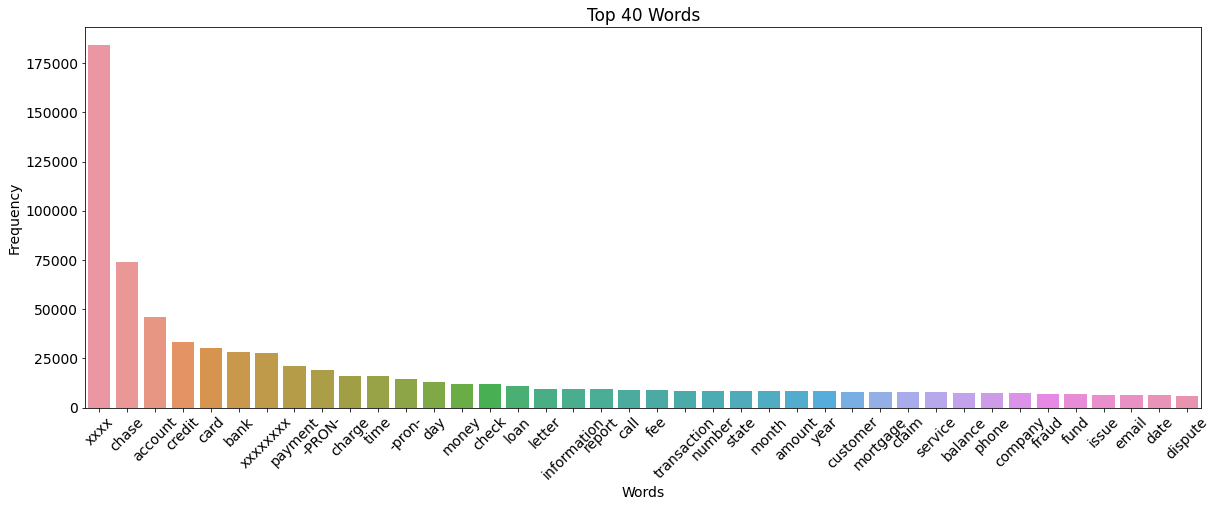

In [44]:
# Get the top 40 most common words among all the lemmatized complaints without WorldNetLemmatizer and without the stopwords
top_40_pos = pd.DataFrame(Counter(" ".join(df_clean['complaint_POS_removed']).split()).most_common(40),columns=['word', 'frequency'])
fig = plt.figure(figsize=(20,7))
g = sns.barplot(
    x='word',
    y='frequency',
    data=top_40_pos
)
g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)
plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 40 Words', fontsize=17)
plt.show()

### Wordcloud for 40 most common words in the processed text 

In [45]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,colormap = 'viridis',stopwords = stopwords, 
                      max_words = 180, contour_width = 3,max_font_size = 80, contour_color = 'steelblue',random_state = 42)

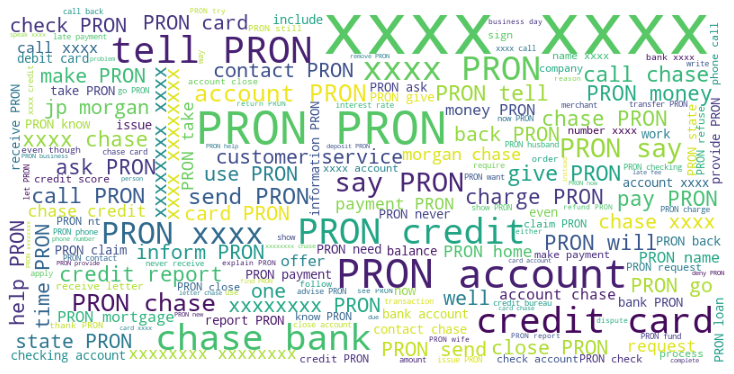

In [46]:
word_db = " ".join(title for title in df_clean.lemmatized_complaints)
wordcloud.generate(word_db)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

- The size of the word in the word-cloud is proportional to the frequency of the word in the dataset

In [27]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean.head(2)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq,Complaint_clean
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help,92,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,xxxx xxxx card agent anniversary date agent information order account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent,65,xxxx xxxx card agent anniversary date agent information order account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent


In [28]:
# Remove the masked NOUNs, Dates etc in the dataset.
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

- Let's create another Word Clound with 'Complaint_clean' column which only now contains the noun terms 

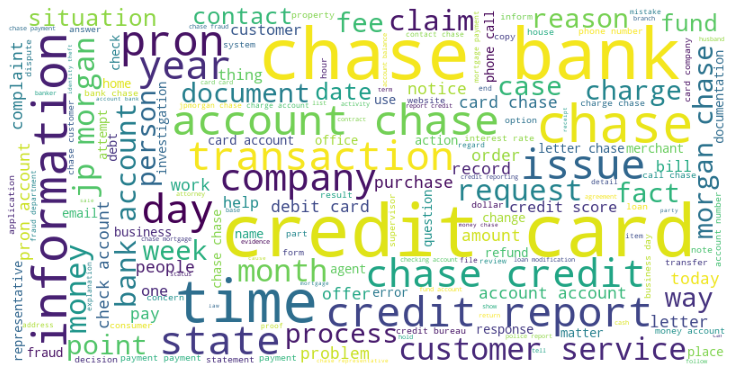

In [50]:
word_db = " ".join(title for title in df_clean.Complaint_clean)
wordcloud.generate(word_db)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [51]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
from nltk import FreqDist
from nltk.util import ngrams 
from nltk.corpus import stopwords
def compute_freq(n):
   textfile = df_clean['Complaint_clean']
   fdist = FreqDist()
   for sentence in textfile:
        if len(sentence) > 1:
          tokens = sentence.split()
          xgrams = ngrams(tokens, n)
          fdist.update(xgrams)
   return fdist

In [53]:
#Print the top 10 words in the unigram frequency
unigram_complaints = compute_freq(n=1)
df_unigram = pd.DataFrame(unigram_complaints.most_common(10)).rename(columns={0: 'unigram', 1:'frequency'})
df_unigram

,unigram,frequency
0,"(chase,)",73941
1,"(account,)",46303
2,"(credit,)",33510
3,"(card,)",30428
4,"(bank,)",28071
5,"(payment,)",20928
6,"(charge,)",16140
7,"(time,)",16038
8,"(-pron-,)",14410
9,"(day,)",12984


In [58]:
df_clean.isnull().sum()

complaint_what_happened    0
lemmatized_complaints      0
complaint_POS_removed      0
word_freq                  0
Complaint_clean            0
dtype: int64

In [39]:
df_clean.to_csv('df_lemmatized_pos_cleaned.csv')

In [42]:
df_clean.loc[df_clean['Complaint_clean'].isnull()]

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq,Complaint_clean


In [44]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
from nltk import FreqDist
from nltk.util import ngrams 
from nltk.corpus import stopwords
def compute_frequency(n):
   textfile = df_clean['Complaint_clean']
   fd = FreqDist()
   for sentence in textfile:
     tokens = sentence.split()
     xgrams = ngrams(tokens, n)
     fd.update(xgrams)
   return fd

In [37]:
df_clean = df_clean.loc[df_clean['Complaint_clean'].notna()]

In [45]:
bigram_complaints = compute_frequency(2)

Lets find out the top 10 bigram frequency in the lemmatized text.

In [46]:
#Print the top 10 words in the bigram frequency
df_bigram = pd.DataFrame(bigram_complaints.most_common(10)).rename(columns={0: 'bigram', 1:'frequency'})
df_bigram

,bigram,frequency
0,"(credit, card)",12863
1,"(chase, bank)",12475
2,"(credit, report)",3964
3,"(account, chase)",3907
4,"(chase, credit)",3305
5,"(customer, service)",3083
6,"(jp, morgan)",2877
7,"(bank, account)",2608
8,"(chase, account)",2516
9,"(morgan, chase)",2477


In [48]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
trigram_complaints = compute_frequency(3)

In [49]:
df_trigram = pd.DataFrame(trigram_complaints.most_common(30)).rename(columns={0: 'trigram', 1:'frequency'})
df_trigram

,trigram,frequency
0,"(jp, morgan, chase)",2365
1,"(chase, credit, card)",2318
2,"(credit, card, account)",1056
3,"(credit, card, company)",985
4,"(credit, card, chase)",963
5,"(account, chase, bank)",905
6,"(chase, bank, account)",707
7,"(morgan, chase, bank)",683
8,"(chase, customer, service)",607
9,"(inquiry, credit, report)",511


- Let's quickly see the top 15 trigrams for lemmatized complaints with with all the POS and masked characters

In [58]:
def compute_lem_frequency(n):
   textfile = df_clean['lemmatized_complaints']
   fd = FreqDist()
   for sentence in textfile:
     tokens = sentence.split()
     xgrams = ngrams(tokens, n)
     fd.update(xgrams)
   return fd
trigram_lem = compute_lem_frequency(3)
pd.DataFrame(trigram_lem.most_common(15)).rename(columns={0: 'trigram', 1:'frequency'})

,trigram,frequency
0,"(xxxx, xxxx, xxxx)",30502
1,"(i, do, not)",7565
2,"(-PRON-, do, not)",4594
3,"(xxxx, xxxx, and)",3923
4,"(that, -PRON-, be)",3789
5,"(on, xxxx, xxxx)",3658
6,"(tell, -PRON-, that)",3632
7,"(i, be, tell)",3547
8,"(-PRON-, be, not)",3328
9,"(xxxx, xxxx, i)",3286


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

- We have already removed the masked characters to get a better vesions of word cloud, but we can run the command once more

In [50]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [52]:
df_clean.head(2)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq,Complaint_clean
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help,92,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,xxxx xxxx card agent anniversary date agent information order account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent,65,card agent anniversary date agent information order account change anniversary date consent recording agent


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [6]:
#Write your code here to initialise the TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(stop_words='english',min_df=2,max_df=0.95,max_features=10000,ngram_range=(1, 3))

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [7]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
text = df_clean['Complaint_clean']
tfidf = tfidf_vectorizer.fit_transform(text)

In [8]:
tfidf_feature_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_feature_df.head(2)

,1st,2nd,3rd,3rd party,aarp,abandon,ability,ability credit,ability loan,absence,...,yesterday chase,yesterday letter,yield,york,york state,yr,yrs,zip,zip code,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [95]:
from nltk.tokenize import  word_tokenize, TweetTokenizer
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def create_token(text):
  text = casual_tokenizer(text)
  text = [each.lower() for each in text]
  return text

In [96]:
# Creating tokens for dictionary 
df_clean['text_tokens'] = df_clean['Complaint_clean'].apply(create_token)
df_clean.head(2)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq,Complaint_clean,text_tokens
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help,92,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,"[morning, name, stop, bank, cardmember, service, debt, verification, statement, bank, debt, mail, month, debt, right, information, consumer, chase, account, advance, help]"
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,xxxx xxxx card agent anniversary date agent information order account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent,65,card agent anniversary date agent information order account change anniversary date consent recording agent,"[card, agent, anniversary, date, agent, information, order, account, change, anniversary, date, consent, recording, agent]"


In [ ]:
from gensim.corpora.dictionary import Dictionary
# Use Gensim's NMF to get the best num of topics via coherence score
tokens = df_clean['text_tokens']

# Create a gensim dictionary - mapping between words and their integer id
dictionary = Dictionary(tokens)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=2,
    no_above=0.95,
    keep_n=5000)


In [ ]:
# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(tok) for tok in tokens]

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

Coherence Score 
- to identify the best number of clusters i.e. topics

In [ ]:
!pip install --upgrade gensim

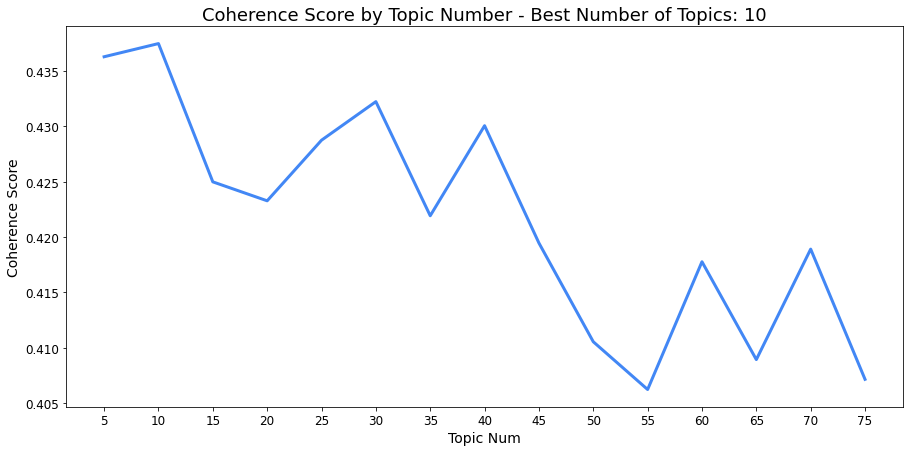

In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.nmf import Nmf
from operator import itemgetter
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=tokens,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

file_name = 'c_score'
'''
fig.savefig(
    file_path + file_name + '.png',
    dpi=fig.dpi,
    bbox_inches='tight'
)
'''
plt.show()

- We can clearly see from the Coherence Score chart that best number of clusters i.e. topic from the given complaints is 10 
- Though the difference between 5 and 10 is not significant and since we are asked to label the complaints into 5 topics so we will choose 5 

In [3]:
from sklearn.decomposition import NMF

In [4]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(
    n_components=num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    #alpha_W=0.0,
    #alpha_H=0.0,
    tol=1e-4,
    random_state=40
)

In [9]:
nmf_model.fit(tfidf)
len(tfidf_vectorizer.get_feature_names())

10000

In [10]:
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1] 

# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist

def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens

In [11]:
#Print the Top15 words for each of the topics

text = df_clean['Complaint_clean']
tfidf_fn=tfidf_vectorizer.get_feature_names()
# Use the top words for each cluster by tfidf weight to create 'topics'

# Getting a df with each topic by document
docweights = nmf_model.transform(tfidf_vectorizer.transform(text))

n_top_words = 15

topic_df = topic_table(
    nmf_model,
    tfidf_fn,
    n_top_words
).T


# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,topics
0,account,bank,check,chase,money,chase bank,fund,deposit,transaction,branch,day,account chase,claim,pron,bank account,account bank check chase money fund deposit transaction branch day claim pron
1,card,credit,credit card,charge,chase,dispute,chase credit,chase credit card,purchase,company,merchant,service,card chase,balance,fee,card credit charge chase dispute purchase company merchant service balance fee
2,loan,mortgage,chase,modification,home,property,morgan,jp,jp morgan,year,morgan chase,document,jp morgan chase,letter,time,loan mortgage chase modification home property morgan jp year document letter time
3,credit,report,inquiry,credit report,inquiry credit,inquiry credit report,account,report credit,debt,score,reporting,information,jpmcb,credit score,identity,credit report inquiry account debt score reporting information jpmcb identity
4,payment,balance,fee,payment payment,month,payment chase,statement,chase payment,chase,pay,time,day,account,payment account,auto,payment balance fee month chase statement pay time day account auto


In [12]:
# Create a df with only the created topics and topic num
topics = topic_df['topics'].reset_index()
topics.columns = ['topic_num', 'topics']

topics

,topic_num,topics
0,0,account bank check chase money fund deposit transaction branch day claim pron
1,1,card credit charge chase dispute purchase company merchant service balance fee
2,2,loan mortgage chase modification home property morgan jp year document letter time
3,3,credit report inquiry account debt score reporting information jpmcb identity
4,4,payment balance fee month chase statement pay time day account auto


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Theft/Dispute Reporting
* Mortgage/Loan
* Credit card or prepaid card
* Others

In [13]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
# Create topic dictionary
topic_label = {
    0 : 0,
    1 : 1,
    2 : 2,
    3 : 3,
    4 : 4
}

topics['topic_label'] = "No Label"
for num in topics.topic_num:
    if num in topic_label.keys():
        topics['topic_label'][num] = topic_label[num]
        
topics


<ipython-input-13-da640b748c7f>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,topic_num,topics,topic_label
0,0,account bank check chase money fund deposit transaction branch day claim pron,0
1,1,card credit charge chase dispute purchase company merchant service balance fee,1
2,2,loan mortgage chase modification home property morgan jp year document letter time,2
3,3,credit report inquiry account debt score reporting information jpmcb identity,3
4,4,payment balance fee month chase statement pay time day account auto,4


In [104]:
# Showing the 3 matrices we get witn nmf
A = tfidf_vectorizer.transform(text)
W = nmf_model.components_
H = nmf_model.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1]))
print('W = {} x {}'.format(W.shape[0], W.shape[1]))
print('H = {} x {}'.format(H.shape[0], H.shape[1]))

A = 21066 x 20000
W = 5 x 20000
H = 21066 x 5


In [14]:
# Get the top predicted topic
text = df_clean['Complaint_clean']
X = nmf_model.transform(tfidf_vectorizer.transform(text))

predicted_topics = []
for each in X:
    if np.argsort(each)[::-1][0] in topic_label.keys():
        predicted_topics.append(topic_label[np.argsort(each)[::-1][0]])
    else:
        predicted_topics.append("Not assigned")

In [15]:
predicted_topics[:15]

[0, 1, 3, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 0, 1]

In [16]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = predicted_topics

In [18]:
df_clean=df_clean.drop(['Unnamed: 0'],axis=1)

In [19]:
#Print the first 5 Complaint for each of the Topics
df_clean_group=df_clean.groupby('Topic').head(5)
df_clean_group.sort_values('Topic')

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq,Complaint_clean,text_tokens,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help,92,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,"['morning', 'name', 'stop', 'bank', 'cardmember', 'service', 'debt', 'verification', 'statement', 'bank', 'debt', 'mail', 'month', 'debt', 'right', 'information', 'consumer', 'chase', 'account', 'advance', 'help']",0
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim number is XXXX with chase,-PRON- grand son give -PRON- check for i deposit -PRON- into -PRON- chase account after fund clear -PRON- chase bank close -PRON- account never pay -PRON- -PRON- money -PRON- say -PRON- need to speek with -PRON- grand son check be clear money be take by -PRON- chase bank refuse to pay -PRON- -PRON- money -PRON- grand son call chase 2 time -PRON- tell -PRON- i should call not -PRON- to verify the check owner -PRON- be out the country most the time date happen check number xxxx claim number be xxxx with chase,grand son chase account fund clear chase bank close account money say son check money chase bank -pron- money son call chase time check owner country time date number xxxx number chase,96,grand son chase account fund clear chase bank close account money say son check money chase bank -pron- money son call chase time check owner country time date number number chase,"['grand', 'son', 'chase', 'account', 'fund', 'clear', 'chase', 'bank', 'close', 'account', 'money', 'say', 'son', 'check', 'money', 'chase', 'bank', '-', 'pron', '-', 'money', 'son', 'call', 'chase', 'time', 'check', 'owner', 'country', 'time', 'date', 'number', 'number', 'chase']",0
10,mishandling of this account by Chase auto and XXXX.,mishandle of this account by chase auto and xxxx,mishandle account chase auto xxxx,9,mishandle account chase auto,"['mishandle', 'account', 'chase', 'auto']",0
6,"With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned. The bank associate and the customer service representative assured me that the funds 

In [20]:
#Create the dictionary of Topic names and Topics

Topic_names = {
    0 : 'Bank Account services',
    1 : 'Theft & Dispute Reporting',
    2 : 'Mortgage & Loan',
    3 : 'Credit card or prepaid card',
    4 : 'Others'
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [21]:
df_clean.head(5)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq,Complaint_clean,text_tokens,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help,92,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,"['morning', 'name', 'stop', 'bank', 'cardmember', 'service', 'debt', 'verification', 'statement', 'bank', 'debt', 'mail', 'month', 'debt', 'right', 'information', 'consumer', 'chase', 'account', 'advance', 'help']",Bank Account services
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,xxxx xxxx card agent anniversary date agent information order account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent,65,card agent anniversary date agent information order account change anniversary date consent recording agent,"['card', 'agent', 'anniversary', 'date', 'agent', 'information', 'order', 'account', 'change', 'anniversary', 'date', 'consent', 'recording', 'agent']",Theft & Dispute Reporting
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card be report on however fraudulent application have be submit -PRON- identity without -PRON- consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,chase card report application submit identity consent service credit identity applicant,32,chase card report application submit identity consent service credit identity applicant,"['chase', 'card', 'report', 'application', 'submit', 'identity', 'consent', 'service', 'credit', 'identity', 'applicant']",Credit card or prepaid card
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10mi

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [22]:
#Create the dictionary again of Topic names and Topics

Topic_names = {     
    'Bank Account services':0,
    'Theft & Dispute Reporting':1,
    'Mortgage & Loan':2,
    'Credit card or prepaid card':3,
    'Others':4
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)
#df = df_clean.copy()
#df['Topic'] = df['Topic'].map(Topic_names)

In [23]:
df_clean.head(2)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,word_freq,Complaint_clean,text_tokens,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning -PRON- name be xxxx xxxx and i appreciate -PRON- if -PRON- could help -PRON- put a stop to chase bank cardmember service \n in i write to chase ask for debt verification and what -PRON- send -PRON- a statement which be not acceptable i be ask the bank to validate the debt instead i be receive mail every month from -PRON- attempt to collect a debt \n i have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for -PRON- help,morning name xxxx xxxx stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account xxxx xxxx xxxx xxxx advance help,92,morning name stop bank cardmember service debt verification statement bank debt mail month debt right information consumer chase account advance help,"['morning', 'name', 'stop', 'bank', 'cardmember', 'service', 'debt', 'verification', 'statement', 'bank', 'debt', 'mail', 'month', 'debt', 'right', 'information', 'consumer', 'chase', 'account', 'advance', 'help']",0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,i upgrade -PRON- xxxx xxxx card in and be tell by the agent who do the upgrade -PRON- anniversary date would not change -PRON- turn the agent be give -PRON- the wrong information in order to upgrade the account xxxx change -PRON- anniversary date from xxxxxxxx to xxxxxxxx without -PRON- consent xxxx have the recording of the agent who be mislead -PRON-,xxxx xxxx card agent anniversary date agent information order account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent,65,card agent anniversary date agent information order account change anniversary date consent recording agent,"['card', 'agent', 'anniversary', 'date', 'agent', 'information', 'order', 'account', 'change', 'anniversary', 'date', 'consent', 'recording', 'agent']",1


In [24]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = pd.DataFrame(columns=['complaint_what_happened','Topic'])
training_data['complaint_what_happened']=df_clean['complaint_what_happened']
training_data['Topic']=df_clean['Topic']

In [25]:
training_data.head(2)

,complaint_what_happened,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,1


In [26]:
training_data.isnull().sum()

complaint_what_happened    0
Topic                      0
dtype: int64

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [27]:
#Write your code to get the Vector count
CV = CountVectorizer(stop_words='english',min_df=2,max_df=0.95,max_features=10000,ngram_range=(1, 3))
vectorizer = CV.fit_transform(training_data['complaint_what_happened'])

In [28]:
print('Vocabulary: ')
print(CV.vocabulary_)
print(len(CV.vocabulary_))

Vocabulary: 
{'good': 4413, 'morning': 5691, 'xxxx': 9065, 'appreciate': 1144, 'help': 4539, 'stop': 7933, 'chase': 2083, 'bank': 1392, 'cardmember': 1922, 'services': 7644, '2018': 268, 'wrote': 8929, 'asking': 1229, 'debt': 3228, 'verification': 8671, 'sent': 7574, 'statement': 7885, 'acceptable': 632, 'validate': 8642, 'instead': 4860, 'receiving': 6866, 'mail': 5367, 'month': 5647, 'attempting': 1292, 'collect': 2631, 'right': 7347, 'know': 5027, 'information': 4775, 'consumer': 2787, 'account': 656, 'thanks': 8129, 'advance': 953, 'morning xxxx': 5694, 'xxxx xxxx': 9754, 'appreciate help': 1145, 'chase bank': 2109, 'cardmember services': 1924, 'wrote chase': 8930, 'chase asking': 2103, 'validate debt': 8643, 'attempting collect': 1293, 'collect debt': 2632, 'information consumer': 4782, 'chase account': 2087, 'account xxxx': 838, 'morning xxxx xxxx': 5695, 'chase account xxxx': 2089, 'account xxxx xxxx': 841, 'xxxx xxxx xxxx': 9943, 'upgraded': 8575, 'card': 1810, 'xx': 8935, 'tol

In [29]:
cv_array = vectorizer.toarray()

In [30]:
# Our final vector:
print('Full vector: ')
print(cv_array)
print(np.sum(cv_array))

Full vector: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]
3430293


In [31]:
wordcount_df = pd.DataFrame(cv_array,columns=CV.get_feature_names())
wordcount_df.head(2)

,00,00 00,00 10,00 100,00 100 00,00 200,00 200 00,00 500,00 500 00,00 account,...,yesterday xx,yesterday xx xx,yesterday xxxx,york,young,yr,yrs,zero,zip,zip code
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Write your code here to transform the word vector to tf-idf

def get_tfidf(cv_df):
  total_docs = cv_df.shape[0]

#Term Frequency // #(Number of times term w appears in a document) / (Total number of terms in the document)
  total_words_doc = cv_df.astype(bool).sum(axis=1)
  tf = cv_df.values/total_words_doc[:,None]

#Inverse document frequency // #log_e(Total number of documents / Number of documents with term w in it)
  words_in_doc = cv_df.astype(bool).sum(axis=0)
  idf = np.log(total_docs/words_in_doc)

  tf_idf = tf*idf.values[None,:]

  return tf_idf

In [33]:
tfidf_df = get_tfidf(wordcount_df)

<ipython-input-32-5928f21ca50e>:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

<ipython-input-32-5928f21ca50e>:8: RuntimeWarning:

invalid value encountered in true_divide



In [34]:
df_tfidf = pd.DataFrame(tfidf_df,columns=[CV.get_feature_names()])
df_tfidf.tail(3)

,00,00 00,00 10,00 100,00 100 00,00 200,00 200 00,00 500,00 500 00,00 account,...,yesterday xx,yesterday xx xx,yesterday xxxx,york,young,yr,yrs,zero,zip,zip code
21063,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
21064,0.031823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03692,0.0,0.0,0.0
21065,0.021652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [35]:
print(df_tfidf.shape)

(21066, 10000)


In [36]:
print(training_data.shape)

(21066, 2)


In [37]:
df_tfidf['Topic']=training_data['Topic']

In [38]:
df_tfidf['Topic'].isnull().sum()

Topic    0
dtype: int64

In [47]:
df_tfidf.isnull().sum()

00                                    0
00 00                                 0
00 10                                 0
00 100                                0
00 100 00                             0
00 200                                0
00 200 00                             0
00 500                                0
00 500 00                             0
00 account                            0
00 annual                             0
00 annual fee                         0
00 applied                            0
00 asked                              0
00 atm                                0
00 available                          0
00 balance                            0
00 bank                               0
00 bonus                              0
00 called                             0
00 called chase                       0
00 card                               0
00 cash                               0
00 charge                             0
00 charged                            0


In [46]:
df_tfidf=df_tfidf.dropna()

In [48]:
df_tfidf.head(2)

,00,00 00,00 10,00 100,00 100 00,00 200,00 200 00,00 500,00 500 00,00 account,...,yesterday xx xx,yesterday xxxx,york,young,yr,yrs,zero,zip,zip code,Topic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [49]:
df_tfidf.describe()

,00,00 00,00 10,00 100,00 100 00,00 200,00 200 00,00 500,00 500 00,00 account,...,yesterday xx xx,yesterday xxxx,york,young,yr,yrs,zero,zip,zip code,Topic
count,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,...,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000
mean,0.010598,0.000337,0.000103,0.000161,0.000152,0.000124,0.000124,0.000149,0.000145,0.001034,...,0.000160,0.000121,0.000417,0.000241,0.000128,0.000315,0.000656,0.000172,0.000124,1.483314
std,0.020059,0.009028,0.002929,0.004033,0.003949,0.003522,0.003522,0.003694,0.003635,0.008302,...,0.003155,0.003074,0.005826,0.005014,0.003317,0.007635,0.007732,0.005046,0.004496,1.321087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.015198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,0.711254,0.841043,0.197432,0.203509,0.205708,0.195829,0.195829,0.222792,0.223591,0.408962,...,0.130698,0.192149,0.240106,0.263076,0.156046,0.611230,0.336882,0.292180,0.310760,4.000000


#### Training & Test Data split

In [3]:
X = df_tfidf.loc[ : , df_tfidf.columns != 'Topic']
y = df_tfidf['Topic']

In [4]:
print(X.shape)
print(y.shape)

(21065, 10000)
(21065,)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

## Model building and evaluation

In [6]:
# ML libraries
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

#### Logistic Regression 

In [7]:
# Linear Regression Model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(multi_class='multinomial',solver='saga',penalty='l2', C=1.0) 
model_lr.fit(X_train, y_train)

C:\Users\abhishek.singh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(multi_class='multinomial', solver='saga')

In [8]:
# Prediction
y_pred_lr = model_lr.predict(X_test)

In [9]:
# Classification Report 
clf_report_lr = classification_report(y_test,y_pred_lr)
print(F'ACC : {accuracy_score(y_test,y_pred_lr)}')
print(clf_report_lr)

ACC : 0.8884405411820555
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1221
           1       0.86      0.96      0.90      1263
           2       0.91      0.88      0.89       759
           3       0.96      0.81      0.88       491
           4       0.92      0.68      0.78       479

    accuracy                           0.89      4213
   macro avg       0.91      0.85      0.87      4213
weighted avg       0.89      0.89      0.89      4213



####  SGD Linear Classifier 
To help converge the linear classifier using Stochastic Gradient Descent 

In [10]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(loss="hinge", penalty="l2",n_jobs=-1,early_stopping=True, n_iter_no_change=10)
model_sgd.fit(X_train, y_train)

SGDClassifier(early_stopping=True, n_iter_no_change=10, n_jobs=-1)

In [11]:
# Prediction
y_pred_sgd = model_sgd.predict(X_test)

In [12]:
# Classification Report 
clf_report_sgd = classification_report(y_test,y_pred_sgd)
print(F'ACC : {accuracy_score(y_test,y_pred_sgd)}')
print(clf_report_sgd)

ACC : 0.9131260384524092
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1221
           1       0.91      0.94      0.93      1263
           2       0.94      0.90      0.92       759
           3       0.95      0.87      0.91       491
           4       0.90      0.83      0.86       479

    accuracy                           0.91      4213
   macro avg       0.92      0.90      0.91      4213
weighted avg       0.91      0.91      0.91      4213



#### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [14]:
# Prediction
y_pred_rf=model_rf.predict(X_test)

In [15]:
# Classification Report 
clf_report_rf = classification_report(y_test,y_pred_rf)
print(F'ACC : {accuracy_score(y_test,y_pred_rf)}')
print(clf_report_rf)

ACC : 0.8756230714455258
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1221
           1       0.85      0.94      0.89      1263
           2       0.89      0.87      0.88       759
           3       0.92      0.86      0.89       491
           4       0.93      0.61      0.73       479

    accuracy                           0.88      4213
   macro avg       0.89      0.84      0.86      4213
weighted avg       0.88      0.88      0.87      4213



#### Multinomial Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
model_mnb.fit(X_train,y_train)

MultinomialNB()

In [17]:
# Prediction 
y_pred_mnb = model_mnb.predict(X_test)

In [18]:
# Classification Report
clf_report_mnb = classification_report(y_test,y_pred_mnb)
print(F'ACC : {accuracy_score(y_test,y_pred_mnb)}')
print(clf_report_mnb)

ACC : 0.8003797768810824
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1221
           1       0.76      0.92      0.83      1263
           2       0.80      0.85      0.82       759
           3       0.91      0.65      0.76       491
           4       0.85      0.31      0.45       479

    accuracy                           0.80      4213
   macro avg       0.83      0.72      0.74      4213
weighted avg       0.81      0.80      0.78      4213



#### Support Vector Machine Classifier (Non Linear Kernel)

In [19]:
from sklearn import svm
model_svm = svm.SVC(kernel='rbf')
model_svm.fit(X_train,y_train)

SVC()

In [20]:
# Prediction 
y_pred_svm = model_svm.predict(X_test)

In [21]:
# Classification Report
clf_report_svm = classification_report(y_test,y_pred_svm)
print(F'ACC : {accuracy_score(y_test,y_pred_svm)}')
print(clf_report_svm)

ACC : 0.9024448136719677
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1221
           1       0.89      0.94      0.92      1263
           2       0.88      0.91      0.89       759
           3       0.95      0.87      0.91       491
           4       0.92      0.76      0.83       479

    accuracy                           0.90      4213
   macro avg       0.91      0.88      0.89      4213
weighted avg       0.90      0.90      0.90      4213



#### Linear Support Vector Classifier

In [22]:
from sklearn import svm
model_lsvc = svm.LinearSVC()
model_lsvc.fit(X_train,y_train)

LinearSVC()

In [23]:
# Prediction 
y_pred_lscv = model_lsvc.predict(X_test)

In [24]:
# Classification Report
clf_report_lsvc = classification_report(y_test,y_pred_lscv)
print(F'ACC : {accuracy_score(y_test,y_pred_lscv)}')
print(clf_report_lsvc)

ACC : 0.9235699026821742
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1221
           1       0.91      0.95      0.93      1263
           2       0.93      0.91      0.92       759
           3       0.95      0.90      0.92       491
           4       0.92      0.86      0.89       479

    accuracy                           0.92      4213
   macro avg       0.93      0.91      0.92      4213
weighted avg       0.92      0.92      0.92      4213



#### AUC ROC curve for LinearSVC multiclass 

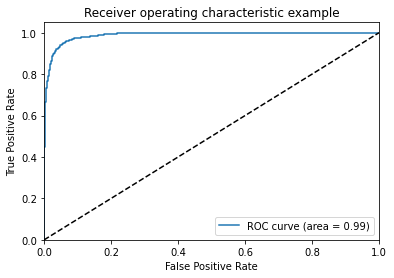

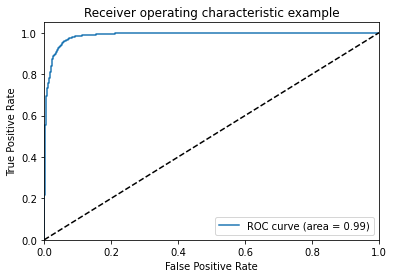

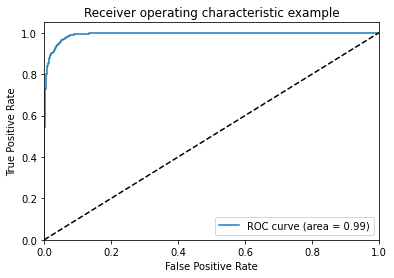

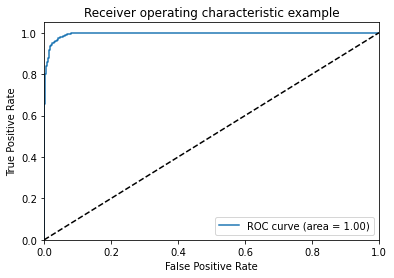

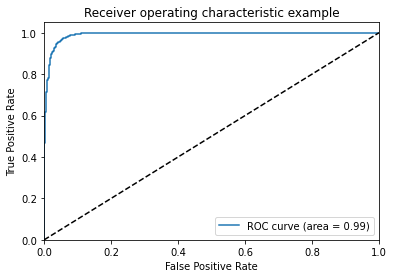

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

P = X
q = np.array(y)

q = label_binarize(q, classes=[0,1,2,3,4])
n_classes = 5

# shuffle and split training and test sets
P_train, P_test, q_train, q_test =train_test_split(P, q, test_size=0.2, random_state=42)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
q_score = clf.fit(P_train, q_train).decision_function(P_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(q_test[:, i], q_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Above shows 5 AUC-ROC plots for results of each of 5 classes from LinearSVC classifier. The ROC curves are optimal and the model gave very good results in terms of accuracy & F1 score. 

#### Confusion Matrix, Precision and Recall 

| Actual/Pred | 0(Yes) | 1(No) |
| --- | --- | --- |
| 0(Yes) | TP | FN |
| 1(No) | FP | TN |


| Metric | Definition 
| --- | --- |
| Precision | Precision is defined as the ratio of true positives to the sum of true and false positives. Out of all the positive predicted, what percentage is truly positive.  
| Recall | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).
| F1 Score | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is. 
| Support | Support is the number of actual occurrences of the class in the dataset. The support is the number of occurrences of each class in y_test. It doesn’t vary between models, it just diagnoses the performance evaluation process. 

## Model Inference

Below table shows a consolidated report of the Accuracy observed with different Classifier alogorithms

| Model | Accuracy | 
| --- | --- |
| Logistic Classifier | 0.888 | 
| Random Forest Classifier | 0.875 | 
| Multinomial Naive Bayes | 0.800 | 
| SGD Classifier | 0.913 | 
| SVC (SVM- rbf kernel) | 0.902 |
| LinearSVC Classifier | 0.923 |


1. Linear Support Vector Classifier (LinearSVC) performed best with 92.3% accuracy and better F1 score for all classes. 
2. LinearSVC & SVM - Classifier with Non linear kernel rbf holds also gave accuracy above 90%. 
3. Out of the three choices given, Logistic Classifier performed only slightly better than Random Forest.